In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Test data has 153,164 rows.

In [44]:
#exoloring test data
test_ds = pd.read_csv('test.csv', header = 0)

print(test_ds.shape)
print(test_ds.head(5))

(153164, 2)
                 id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.


The test labels file also has 153164 rows; however, not all rows contain valid values.  For example, some rows contain "-1" for all test categories.  Per the Kaggle site, a value of "-1" meant it was not used for scoring during the Kaggle competition for this data set.  For our purposes, we will just disregard rows that do not have any value values since it won't provide us a good way to validate our results.  When we filter out the rows with invalid values, we are still left with a test data set of 63,973 rows.

In [55]:
#exploring test data
test_labels_ds = pd.read_csv('test_labels.csv', header=0, na_values=-1)

print(test_labels_ds.shape)
# print(test_labels_ds.head(5))

# null_data = test_labels_ds[test_labels_ds.isnull().any(axis=1)]
#
# print(null_data.shape)
# print(null_data.head())


non_null_data = test_labels_ds[~test_labels_ds.isnull().any(axis=1)]

print(non_null_data.shape)

(153164, 7)
(63978, 7)
                      id  toxic  severe_toxic  obscene  threat  insult  \
153142  fff69311f306df44    0.0           0.0      0.0     0.0     0.0   
153144  fff7159b3ee95618    0.0           0.0      0.0     0.0     0.0   
153145  fff718ffe5f05559    0.0           0.0      0.0     0.0     0.0   
153147  fff83b80284d8440    0.0           0.0      0.0     0.0     0.0   
153149  fff8f521a7dbcd47    0.0           0.0      0.0     0.0     0.0   
153150  fff8f64043129fa2    0.0           0.0      0.0     0.0     0.0   
153151  fff9d70fe0722906    0.0           0.0      0.0     0.0     0.0   
153154  fffa8a11c4378854    0.0           0.0      0.0     0.0     0.0   
153155  fffac2a094c8e0e2    1.0           0.0      1.0     0.0     1.0   
153156  fffb5451268fb5ba    0.0           0.0      0.0     0.0     0.0   

        identity_hate  
153142            0.0  
153144            0.0  
153145            0.0  
153147            0.0  
153149            0.0  
153150            

category: toxic count: 6090.0
category: severe_toxic count: 367.0
category: obscene count: 3691.0
category: threat count: 211.0
category: insult count: 3427.0
category: identity_hate count: 712.0


Text(0.5, 0, 'Comment Class ')

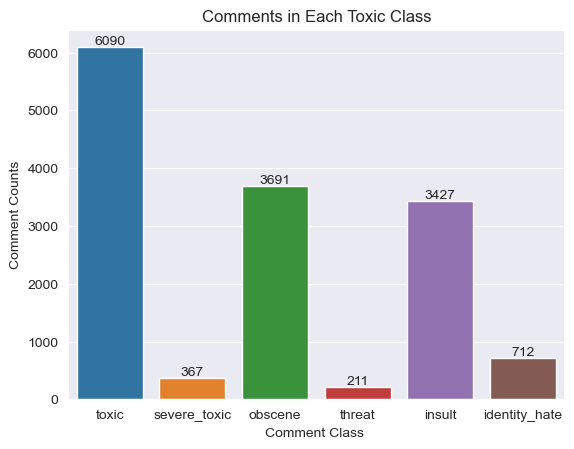

In [53]:
#Test Data - Ratio of comments in each toxic class for all tests which have valid labels

categories= list(non_null_data.columns.values[1:])

counts=[]
for category in categories:
    count=non_null_data[category].sum()
    print("category: "+category + " count: "+str(count))
    ratio= round(count/len(non_null_data),3)
    counts.append((category,count,ratio))
category_stat = pd.DataFrame(counts, columns=["Class","Counts","Percentage"])
category_stat

ax= sns.barplot(x="Class",y="Counts",data=category_stat)
ax.bar_label(ax.containers[0])
plt.title("Comments in Each Toxic Class")
plt.ylabel('Comment Counts')
plt.xlabel('Comment Class ')

In [39]:
#exploring training data
train_ds = pd.read_csv('train.csv', header=0)

# print(train_ds.shape)
#print(train_ds.head(5))

toxic_comments = train_ds.loc[(train_ds['toxic'] == 0.0) & (train_ds['identity_hate'] == 1.0)]
print(toxic_comments.shape)
print(toxic_comments.head(1))

(103, 8)
                    id                                       comment_text  \
3620  09b51ed1ee5e29a1  Mate, sound like you are jewish\n\nGayness is ...   

      toxic  severe_toxic  obscene  threat  insult  identity_hate  
3620      0             0        0       0       0              1  


In [ ]:
### Word2Vec and Doc2Vec Resources

#### Word2Vec
* https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/


#### Doc2Vec
* https://www.geeksforgeeks.org/nlp-gensim-tutorial-complete-guide-for-beginners/
* https://thinkinfi.com/gensim-doc2vec-python-implementation/
* https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4

#### Hypertuning Parameters
* https://medium.com/betacom/hyperparameters-tuning-tf-idf-and-doc2vec-models-73dd418b4d

### Word2Vec Example with Alice in Wonderland
Example from: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

Word2Vec
* https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/


Doc2Vec
https://www.geeksforgeeks.org/nlp-gensim-tutorial-complete-guide-for-beginners/

https://thinkinfi.com/gensim-doc2vec-python-implementation/

https://towardsdatascience.com/multi-class-text-classification-with-doc2vec-logistic-regression-9da9947b43f4



In [21]:
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

warnings.filterwarnings(action = 'ignore')

import gensim
from gensim.models import Word2Vec

# Read 'alice.txt' file
sample = open("Datasets/alice.txt")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
#sentence tokenizer
for i in sent_tokenize(f):
    print("i" + str(i))
    temp = []

    # tokenize the sentence into words
    # each sentence is broken into tokens and
    # stored in the array
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

print("Number of words"+str(len(data)))
#print(data[0])

# Create CBOW model
model1 = gensim.models.Word2Vec(data, min_count = 1,
                              vector_size = 100, window = 5)

# Print results
print("Cosine similarity between 'alice' " +
               "and 'wonderland' - CBOW : ",
    model1.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))

print("Cosine similarity between 'suddenly' " +
                 "and 'considering' - CBOW : ",
      model1.wv.similarity('suddenly', 'considering'))

# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,
                                             window = 5, sg = 1)

# Print results
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ",
    model2.wv.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))


iThe Project Gutenberg eBook of Alice’s Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever.
iYou may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org.
iIf you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.
iTitle: Alice’s Adventures in Wonderland  Author: Lewis Carroll  Release Date: January, 1991 [eBook #11] [Most recently updated: October 12, 2020]  Language: English  Character set encoding: UTF-8  Produced by: Arthur DiBianca and David Widger  *** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***  [Illustration]     Alice’s Adventures in Wonderland  by Lewis Carroll  THE MILLENNIUM FULCRUM EDITION 3.0  Contents   CHAPTER I.
iDown the Rabbit-H

#### Word2Vec Obtaining the average vector per 2 words
Can be easily modified to get average vector per sentence

In [19]:
vector1 = model1.wv['alice']
vector2 = model1.wv['wonderland']


print("Vector 1:"+str(vector1)+" size: "+str(len(vector1)))
print("Vector 2:"+str(vector2)+" size: "+str(len(vector2)))

print("Average of each vector" + str(vector1 + vector2 / 2))

Vector 1:[ 0.03911355  0.3277369   0.20070387  0.3414028   0.23722586 -0.77095675
  0.30934262  1.1254013  -0.48281136 -0.5400726  -0.03577211 -0.614403
 -0.12603025  0.5711816   0.1112761  -0.43727526  0.04702746 -0.44798
 -0.0963648  -1.0101691   0.19258244  0.05075227  0.6513571  -0.24698074
 -0.14057544 -0.14784287 -0.456729    0.07056938 -0.42065492 -0.07794103
  0.4852317  -0.21596582  0.372265   -0.36727908 -0.2588082   0.6361276
  0.03797197 -0.39253014 -0.3676791  -0.6857265  -0.00721241 -0.42191675
 -0.12583053  0.28466082  0.14035976 -0.1918786  -0.15926373 -0.24679454
  0.19356698  0.56214     0.34515318 -0.45781216 -0.19179897 -0.23687167
 -0.23917773  0.10022032  0.08675062 -0.07612281 -0.4565917   0.09447047
  0.15211552  0.16627198  0.05090683  0.07908513 -0.65219367  0.6374512
  0.11603731  0.7883181  -0.8749471   0.72634315 -0.26145062  0.663163
  0.5802753  -0.0898296   0.842235    0.38130644 -0.06625951 -0.05378973
 -0.47098064 -0.11232378 -0.46565583  0.07021688 -0

### Doc2Vec Example with Alice in Wonderland
Example from: https://www.geeksforgeeks.org/nlp-gensim-tutorial-complete-guide-for-beginners/

In [34]:
import gensim
import gensim.downloader as api
from gensim.models import doc2vec

# Read 'alice.txt' file
sample = open("Datasets/alice.txt")
s = sample.read()

# Replaces escape character with space
f = s.replace("\n", " ")

data = []

# iterate through each sentence in the file
#sentence tokenizer
for i in sent_tokenize(f):
    #print("i" + str(i))
    temp = []

    # tokenize the sentence into words
    # each sentence is broken into tokens and
    # stored in the array
    for j in word_tokenize(i):
        temp.append(j.lower())

    data.append(temp)

print("Number of sentences： "+str(len(data)))

# # get dataset
# dataset = api.load("text8")
# data =[]
# for w in dataset:
#   data.append(w)

# To train the model we need a list of gen sim tagged documents
# in this case a document is a sentence
def tagged_document(list_of_ListOfWords):
  for x, ListOfWords in enumerate(list_of_ListOfWords):
    yield doc2vec.TaggedDocument(ListOfWords, [x])

# training data
# a list of tagged words amonst the documents
data_train = list(tagged_document(data))

# should correspond to the number of sentences in the doc
print("Length of tagged document list: "+ str(len(data_train)))


# print trained dataset
#print(data_train[:1])

# Initialize the model
d2v_model = doc2vec.Doc2Vec(vector_size = 40, min_count = 2, epochs = 1000)



# build the vocabulary
# input a list of docyments
d2v_model.build_vocab(data_train)

#print model vocabulary
print("Model vocabulary:" + str(d2v_model.wv.key_to_index))

# Train Doc2Vec model
d2v_model.train(data_train, total_examples = d2v_model.corpus_count, epochs = d2v_model.epochs)

# Analyzing the output
Analyze = d2v_model.infer_vector(['violent', 'means', 'to', 'destroy'])
print("The vector of the output:" + str(Analyze))

Number of sentences： 1102
Length of tagged document list: 1102
Model vocabulary:{',': 0, 'the': 1, '“': 2, '”': 3, 'and': 4, '.': 5, 'to': 6, '’': 7, 'a': 8, 'of': 9, 'it': 10, 'she': 11, 'i': 12, 'you': 13, 'said': 14, '!': 15, 'in': 16, 'alice': 17, 'was': 18, 'that': 19, 'as': 20, ':': 21, 'her': 22, 'with': 23, 'at': 24, 't': 25, '?': 26, 's': 27, 'on': 28, ';': 29, 'all': 30, 'this': 31, 'had': 32, 'for': 33, 'not': 34, 'but': 35, 'be': 36, 'or': 37, 'they': 38, 'so': 39, 'what': 40, 'very': 41, 'little': 42, 'he': 43, 'if': 44, 'out': 45, 'is': 46, 'about': 47, 'down': 48, 'one': 49, 'there': 50, 'up': 51, 'no': 52, 'his': 53, 'do': 54, 'then': 55, 'project': 56, '*': 57, 'were': 58, 'like': 59, 'by': 60, 'have': 61, 'herself': 62, 'went': 63, 'them': 64, 'when': 65, 'again': 66, 'would': 67, 'any': 68, 'queen': 69, 'could': 70, 'thought': 71, '(': 72, 'know': 73, ')': 74, 'can': 75, 'are': 76, 'off': 77, 'see': 78, 'time': 79, 'how': 80, 'into': 81, 'who': 82, 'your': 83, 'me': 

### Word2Vec vs. Doc2Vec

Word2Vec gives us vectors for each word.  In order to make this useful for our project, we would have to take a mean of the vectors for each word in a comment.  This adds an extra step.  Doc2Vec gives us a vector from the provided "document".  In our case the document would be the comment.  I suggest using Doc2Vec over Word2Vec since it cuts down an extra step.  Furthermore, our for our use case of classifying a comment altogether, Doc2Vec makes more sense.

### Using Doc2Vec for ToxicApp

Below are some preprocessing steps (copied from ToxicApp_Sandbox.ipynb)

In [48]:
import pandas as pd
import numpy as np
import pickle
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings

#from sklearn's...
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import TfidfTransformer #Transform a count matrix to a normalized tf or tf-idf representation
from sklearn.feature_extraction.text import TfidfVectorizer #Convert a collection of raw documents to a matrix of TF-IDF features
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB

In [49]:
file_object = open('clean_data.p', 'rb')
clean_data = pickle.load(file_object)
train_ds = clean_data[0]
test_ds = clean_data[1]


In [50]:
print(train_ds.head(10))

                 id                                       comment_text  toxic  \
0  0000997932d777bf  explanation edit make username hardcore metall...      0   
1  000103f0d9cfb60f  daww match background colour im seemingly stic...      0   
2  000113f07ec002fd  hey man im really try edit war guy constantly ...      0   
3  0001b41b1c6bb37e  cant make real suggestion improvement wonder s...      0   
4  0001d958c54c6e35                sir hero chance remember page thats      0   
5  00025465d4725e87           congratulation well use tool well · talk      0   
6  0002bcb3da6cb337                        cocksucker piss around work      1   
7  00031b1e95af7921  vandalism matt shirvington article revert plea...      0   
8  00037261f536c51d  sorry word nonsense offensive anyway im intend...      0   
9  00040093b2687caa               alignment subject contrary dulithgow      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0          

In [51]:
test_ds

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful youll ever whats ha...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland —
3,00017563c3f7919a,look back source information update correct fo...
4,00017695ad8997eb,dont anonymously edit article
...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing toolongcrap
153160,fffd7a9a6eb32c16,throw field home plate get faster throw cut ma...
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...
153162,fffe8f1340a79fc2,one found nation eu germany law return quite s...


In [52]:
#full training data moved the id column
train_ds_subset2 = train_ds.loc[:,'comment_text']
train_labels_subset2 = train_ds.loc[:,'toxic']

print("Train data size: "+str(train_ds_subset2.shape))
print("Train labels size:: "+str(train_labels_subset2.shape))

#remove -1s
non_null_data = test_labels[test_labels.loc[:,'toxic'] != -1]
#subset of testing data; removed the id column
test_ds_subset2 =test_ds.loc[non_null_data.index]
test_ds_subset2 = test_ds_subset2.loc[:,'comment_text']
test_labels_subset2 = non_null_data.loc[:,'toxic']
print(test_ds_subset2.size)
print(test_labels_subset2.size)


Train data size: (159571,)
Train labels size:: (159571,)
63978
63978


In [53]:
#Could convert the comment labels to one label
#train_ds[(train_ds['toxic'] == 1) & (train_ds['identity_hate'] == 1)]

#### Example using Doc2Vec
The idea is to generate a doc2vec model using our training data.  Then, from the model we can get a vector for each comment passed into it.  Below I show an example of passing in the comments we used to train the model.

Getting a vector for each training comment will then allow us to train classification models using vectors for each training instance and their labels.

We will then getting a doc2vec vector for each test instance and predict using this vectorized test instance against the model we created for classification.


In [54]:
"""
A function to tokenize all data in a dataframe
:param data: a dataframe containing comments to tokenize
"""

def tokenize_comments(dataframe):
    data = []
    for row in dataframe:
        data.append(tokenize_each_comment(row))
    return data
"""
A function to tokenize a single comment
:param data: a single comment to tokenize
"""
def tokenize_each_comment(comment):
    temp = []
    for j in word_tokenize(comment):
        temp.append(j)
    return temp

tokenize_training_comments = tokenize_comments(train_ds_subset2.head(5)) #2000 here to avoid size constraints
print("Example of 1 tokenized TRAIN comment" + str(tokenize_training_comments[0]))

print("Array of tokenize comment size:" + str(len(tokenize_training_comments)))



"""
A function to generate a list of tagged documents to train a
Doc2Vec model
:param list_of_tokenized_comments: A list of tokenized comments
"""
def tagged_document(list_of_tokenized_comments):
  for x, ListOfWords in enumerate(list_of_tokenized_comments):
    yield doc2vec.TaggedDocument(ListOfWords, [x])

# training data
d2v_data_train = list(tagged_document(tokenize_training_comments))

print("DV2 data train size:"+str(len(d2v_data_train)))
print("Example of 1 tagged comment:"+str(d2v_data_train[0]))

Example of 1 tokenized TRAIN comment['explanation', 'edit', 'make', 'username', 'hardcore', 'metallica', 'fan', 'revert', 'werent', 'vandalism', 'closure', 'gas', 'vote', 'new', 'york', 'doll', 'fac', 'please', 'dont', 'remove', 'template', 'talk', 'page', 'since', 'im', 'retire']
Array of tokenize comment size:5
DV2 data train size:5
Example of 1 tagged comment:TaggedDocument(['explanation', 'edit', 'make', 'username', 'hardcore', 'metallica', 'fan', 'revert', 'werent', 'vandalism', 'closure', 'gas', 'vote', 'new', 'york', 'doll', 'fac', 'please', 'dont', 'remove', 'template', 'talk', 'page', 'since', 'im', 'retire'], [0])


In [55]:
from gensim.models import doc2vec

# Initialize the model
d2v_toxic_model = doc2vec.Doc2Vec(vector_size = 100, min_count = 2, epochs = 10)

# build the vocabulary
# input a list of docyments
d2v_toxic_model.build_vocab(x for x in d2v_data_train)

#print model vocabulary
# print("Model vocabulary:" + str(d2v_model.wv.key_to_index))

#utils.shuffle(d2v_data_train, random_state=16)

# Train Doc2Vec model
d2v_toxic_model.train(d2v_data_train, total_examples = d2v_toxic_model.corpus_count, epochs = d2v_toxic_model.epochs)

#d2v_toxic_model.save('d2v_toxic_model')

# Analyzing the output of 1 test data sample
#tokenize_training_comments = tokenize_comments(test_ds_subset2.head())
#print("Example of 1 tokenized TEST comment" + str(tokenize_training_comments[0]))


#analyze = d2v_toxic_model.infer_vector(tokenize_training_comments[0])
#print("The vector of the output:" + str(analyze))

In [56]:
print(d2v_toxic_model.corpus_count)

5


In [59]:
import time
from numpy import savetxt
"""
A helper method to infer a vector from the Doc2Vec model passed in
:param model : a Doc2Vec model to infer a vector
:param model : A tagged comment to infer a vector on
"""
def get_vector_from_model(model, row):
    return model.infer_vector(tokenize_comments(row))

"""
A method that creates a list of vectors from a Doc2Vec model
: param model : a Doc2Vec model
: param input : a data frame to infer Doc2Vec vectors from
: param save_file_name [OPTIONAL] : If a string is provided,
the vectors will be saved using this file name.
"""
def get_doc2vec_vector(model, input, save_file_name):
    comments = input
    #count = 0
    vectors = []
    for comment in comments:
        #count = count + 1
        #print("Vectorizing: "+str(count)+" comment.")
        vectors.append(model.infer_vector(tokenize_each_comment(comment)))

    #save to file if a file name is present
    if save_file_name != "":
        print("Saving vectors to file: " + str(save_file_name))
        savetxt(save_file_name, vectors)

    return vectors

print(train_ds_subset2.shape)

start = time.time()
print("Inferring training Vectors")
data_vector_train = get_doc2vec_vector(d2v_toxic_model, train_ds_subset2.head(5), "")
end = time.time()


print("Vector size" + str(len(data_vector)))
time_taken = end - start
print("Time taken:"+str(time_taken))
print("average per vector:"+str(time_taken/len(train_ds_subset2)))

start = time.time()
print("Inferring test Vectors")
data_vector_test = get_doc2vec_vector(d2v_toxic_model, test_ds_subset2.head(5), "")
end = time.time()


print("Vector size" + str(len(data_vector)))
time_taken = end - start
print("Time taken:"+str(time_taken))
print("average per vector:"+str(time_taken/2000))

(159571,)
Inferring training Vectors
Vector size5
Time taken:0.003551959991455078
average per vector:2.2259433051463475e-08
Inferring test Vectors
Vector size5
Time taken:0.0016880035400390625
average per vector:8.440017700195313e-07


In [58]:
### KMeans

In [118]:
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import TfidfTransformer #Transform a count matrix to a normalized tf or tf-idf representation
from sklearn.feature_extraction.text import TfidfVectorizer #Convert a collection of raw documents to a matrix of TF-IDF features

corpus = train_ds['comment_text']
c1 = corpus.head(5)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(c1)
terms = vectorizer.get_feature_names_out()
terms

X = pd.DataFrame(X.toarray())
X

tfidfTransform = TfidfTransformer()
X_tfidf = tfidfTransform.fit_transform(X)
X_tfidf = pd.DataFrame(X_tfidf.toarray())
X_tfidf

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208745,...,0.208745,0.000000,0.208745,0.208745,0.000000,0.000000,0.208745,0.000000,0.000000,0.208745
1,0.000000,0.000000,0.000000,0.000000,0.317869,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.317869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.222236,0.000000,0.000000,0.000000,0.000000,0.000000,0.222236,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.222236,0.000000,0.000000,0.000000,0.000000
3,0.132673,0.000000,0.132673,0.132673,0.000000,0.132673,0.132673,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.132673,0.000000,0.000000,0.132673,0.132673,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.428411,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [120]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0
)

y_km = km.fit(X_tfidf)

y_km.predict()

3